# **Atividade 2** - KNN Vizinhos mais próximos, NORMALIZAÇÃO USANDO **MinMaxScaler()**

**Aluno:** Vinícius Venceslau Venancio da Penha

**ELE0606** - Tópicos Especiais em IA

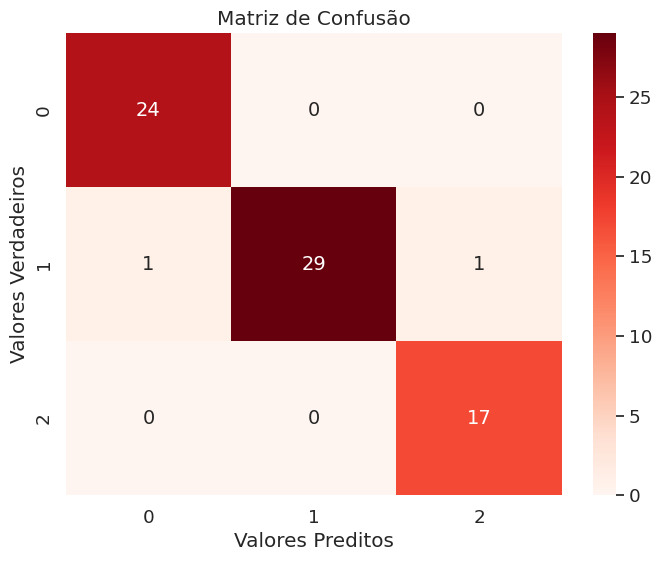

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

wine_data = load_wine()
wine_df = pd.DataFrame(wine_data['data'], columns = wine_data['feature_names'])

#Adicionar a coluna de 'target' ou classe no dataframe criado.
wine_df['classe'] = wine_data['target']

#Salvar os valores de classe, antes de removê-los do dataframe.
wineClasse = wine_df['classe']

#Remover a coluna de classe, pois é a saída (resposta) do nosso sistema e a máquina deve prever esses valores.
wine_df.drop(['classe'], axis=1, inplace=True)

#Normalizar o meu dataframe.
normalizar = MinMaxScaler()

wine_df_normalizado = normalizar.fit_transform(wine_df)

#Converter novamente para dataframe.
wine_df_normalizado = pd.DataFrame(wine_df_normalizado, columns=wine_df.columns)

#Agora SIM, de fato vamos desenvolver a parte de treinamento:
X_train, X_test, Y_train, Y_test = train_test_split(wine_df_normalizado, wineClasse, test_size=0.40, random_state=13)

#Convertendo os conjuntos de treinamento e teste do pandas DataFrame para matrizes NumPy. Isso é comum quando se trabalha com bibliotecas de machine learning como o scikit-learn, que frequentemente esperam matrizes NumPy como entrada.
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

#Função KNN, cujo os parâmetros são: número de vizinhos e O valor padrão é 'uniform', o que significa que todos os vizinhos têm o mesmo peso.
def aplicacao_knn(neigh, weight='uniform'):
    knn = KNeighborsClassifier(n_neighbors=neigh, weights=weight)
    knn.fit(X_train, Y_train) #Esta linha treina o modelo k-NN com os dados de treinamento. X_train são os recursos de treinamento e Y_train são os rótulos de classe correspondentes.
    pred_knn = knn.predict(X_test) #Depois de treinar o modelo, você usa o conjunto de teste (X_test) para fazer previsões usando o modelo k-NN treinado. As previsões são armazenadas em pred_knn.
    return pred_knn #Finalmente, a função retorna as previsões feitas pelo k-NN no conjunto de teste.

#Primeiro Teste:
#k = 7
#pred_knn = aplicacao_knn(k)
#print(f'A acurácia do modelo para K={k} é de {accuracy_score(Y_test, pred_knn):.4f}')

#Valores de k para coleta dos resultados.
valores_k = [1, 3, 5, 7, 9]

#Número de representantes por classe, entende-se como número de simulações.
qnt_simulacoes = [10, 20, 30, 40, 50]

#DataFrame para armazenar as médias da acurácia.
dfPrecisao = pd.DataFrame(columns=valores_k, index=qnt_simulacoes)

#Listas para armazenar as acurácias de treinamento e teste.
treino_precisoes = []
teste_precisoes = []

for k in valores_k:
    pred_knn = aplicacao_knn(k)
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')

    #Calcular as acurácias de treinamento e teste.
    knn.fit(X_train, Y_train)
    train_accuracy = accuracy_score(Y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(Y_test, pred_knn)

    #Adiciona as acurácias às listas.
    treino_precisoes.append(train_accuracy)
    teste_precisoes.append(test_accuracy)

#Criação da matriz confusão:
cm = confusion_matrix(Y_test, aplicacao_knn(7))   #cm armazenará a matriz.

#Plotar a matriz de confusão:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  #Ajuste o tamanho da fonte

sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', annot_kws={"size": 14})
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Verdadeiros")
plt.title("Matriz de Confusão")
plt.show()